In [1]:
import nltk
from nltk.corpus import stopwords
import texthero as hero

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
import gensim
path = "C:\\Temp\\GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [3]:
w = model['happy']

In [4]:
print(len(w))

300


In [5]:
print(w)

[-5.18798828e-04  1.60156250e-01  1.60980225e-03  2.53906250e-02
  9.91210938e-02 -8.59375000e-02  3.24218750e-01 -2.17285156e-02
  1.34765625e-01  1.10351562e-01 -1.04980469e-01 -2.90527344e-02
 -2.38037109e-02 -4.02832031e-02 -3.68652344e-02  2.32421875e-01
  3.20312500e-01  1.01074219e-01  5.83496094e-02 -2.91824341e-04
 -3.29589844e-02  2.11914062e-01  4.32128906e-02 -8.59375000e-02
  2.81250000e-01 -1.78222656e-02  3.79943848e-03 -1.71875000e-01
  2.06054688e-01 -1.85546875e-01  3.73535156e-02 -1.21459961e-02
  2.04101562e-01 -3.80859375e-02  3.61328125e-02 -8.15429688e-02
  8.44726562e-02  9.37500000e-02  1.44531250e-01  7.42187500e-02
  2.51953125e-01 -7.91015625e-02  8.69140625e-02  1.58691406e-02
  1.09375000e-01 -2.23632812e-01 -5.15747070e-03  1.68945312e-01
 -1.36718750e-01 -2.51464844e-02 -3.85742188e-02 -1.33056641e-02
  1.38671875e-01  1.76757812e-01  1.10351562e-01  1.51367188e-01
  7.86132812e-02 -1.69921875e-01  1.20605469e-01 -4.37500000e-01
 -4.32128906e-02  1.34765

In [6]:
w1 = model['happy']
w2 = model['glad']

dist = np.linalg.norm(w1-w2)
print(dist)

1.8778034


In [7]:
w1 = model['happy']
w2 = model['sad']

dist = np.linalg.norm(w1-w2)
print(dist)

2.6144648


In [8]:
w1 = model['happy']
w2 = model['terrified']

dist = np.linalg.norm(w1-w2)
print(dist)

3.1200507


In [9]:
model.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [10]:
model.doesnt_match("happy sad glad proud".split())

'sad'

In [11]:
model.similarity('happy', 'glad')

0.7408891

In [12]:
model.similarity('happy', 'sad')

0.5354614

In [13]:
model.similarity('happy', 'terrified')

0.32340586

In [14]:
model.most_similar(positive=['woman', 'king'],negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [15]:
df = pd.read_csv('datasets/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
df.shape

(568454, 10)

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

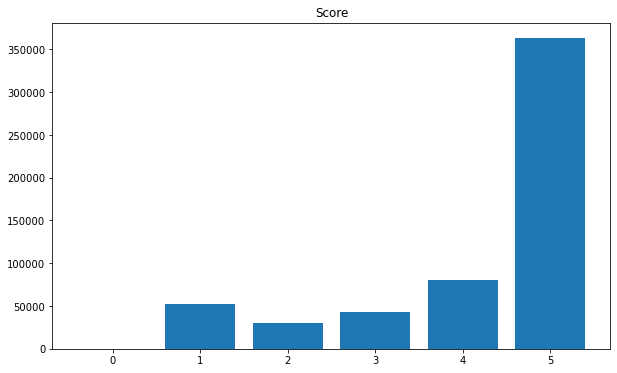

In [17]:
df.hist(column='Score', figsize=(10,6), bins=np.arange(7) - 0.5, grid=False, rwidth=0.8)

In [18]:
hero.remove_stopwords(df['Text'].astype(str), stopwords.words('portuguese')).values[0]

hero.remove_digits(df['Text'].astype(str)).values[0]
hero.remove_punctuation(df['Text'].astype(str)).values[0]
hero.remove_urls(df['Text'].astype(str)).values[0]
hero.remove_brackets(df['Text'].astype(str)).values[0]
hero.remove_whitespace(df['Text'].astype(str)).values[0]


'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.'

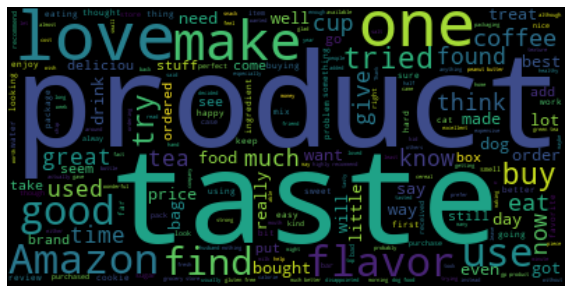

In [19]:
# Para instalar wordcloud, abra um terminal e execute [pip install wordcloud]
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
df['Sentiment'] = df['Score'].apply(lambda rating : 1 if rating > 3 else 0)

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [22]:
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == 0]

array([[<AxesSubplot:title={'center':'Sentiment'}>]], dtype=object)

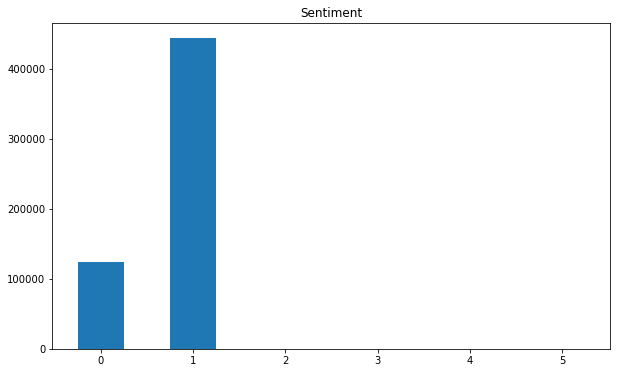

In [23]:
df.hist(column='Sentiment', figsize=(10,6), bins=np.arange(7) - 0.5, grid=False, rwidth=0.5)

In [24]:
from sklearn.model_selection import train_test_split

X = df['Text']
Y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
x_train.shape, y_train.shape

((454763,), (454763,))

In [26]:
x_test.shape, y_test.shape

((113691,), (113691,))

In [27]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [28]:
from sklearn.preprocessing import scale
n_dim = 300
x_train_vet = np.concatenate([buildWordVector(w, n_dim) for w in x_train])
x_train_vet = scale(x_train_vet)

In [29]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC().fit(x_train_vet, y_train)

In [30]:
x_test_vet = np.concatenate([buildWordVector(w, n_dim) for w in x_test])
x_test_vet = scale(x_test_vet)

In [31]:
y_pred = svm_model.predict(x_test_vet)

In [32]:
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [33]:
df_results.head()

,y_test,y_pred
114559,1,1
561458,1,1
128666,1,1
447001,1,1
112467,0,1


In [34]:
df_crosstab = pd.crosstab(df_results.y_pred, df_results.y_test)
df_crosstab

y_test,0,1
y_pred,,
0,1053,871
1,23954,87813


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia : ", accuracy)
print("Precisão : ", precision)
print("Recall : ", recall)

Acurácia :  0.7816449850911682
Precisão :  0.7856791360598387
Recall :  0.9901786116999685


In [37]:
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss='log', penalty='l1')
lr.fit(x_train_vet, y_train)

lr.score(x_test_vet, y_test)

0.7790414368771494

In [38]:
from gensim.models.word2vec import Word2Vec

w2v = Word2Vec(size=n_dim, min_count=10)
w2v.build_vocab(x_train)

In [39]:
print(w2v.epochs)

5


In [40]:
print(w2v.corpus_count)

454763


In [41]:
w2v.train(x_train, epochs=15, total_examples = w2v.corpus_count)

(647787660, 2976883845)

In [42]:
def buildWordVectorFromW2v(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [43]:
from sklearn.preprocessing import scale
n_dim = 300
x_train_w2v = np.concatenate([buildWordVectorFromW2v(w, n_dim) for w in x_train])
x_train_w2v = scale(x_train_w2v)

In [44]:
x_test_w2v = np.concatenate([buildWordVectorFromW2v(w, n_dim) for w in x_test])
x_test_w2v = scale(x_test_w2v)

In [45]:
svm_model = LinearSVC().fit(x_train_w2v, y_train)

In [46]:
y_pred = svm_model.predict(x_test_w2v)

In [47]:
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [48]:
df_results.head()

,y_test,y_pred
114559,1,1
561458,1,1
128666,1,1
447001,1,1
112467,0,1


In [49]:
df_crosstab = pd.crosstab(df_results.y_pred, df_results.y_test)
df_crosstab

y_test,0,1
y_pred,,
0,1505,1641
1,23502,87043


In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia : ", accuracy)
print("Precisão : ", precision)
print("Recall : ", recall)

Acurácia :  0.7788479299152967
Precisão :  0.7873987968700529
Recall :  0.9814960985070588


In [51]:
lr = SGDClassifier(loss='log', penalty='l1')
lr.fit(x_train_w2v, y_train)

lr.score(x_test_w2v, y_test)

0.7824014213965925